In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import sqlalchemy as db
import matplotlib.pyplot as plt
import os

### First we will create the connection to the DB, and see what tables we have¶

In [2]:
#Instatiate out database variable using the path 
path = '/Users/obinnadinneya/Desktop/DATA SCIENCE FOLDER'
database = path + 'europeansoccer.sqlite'

In [3]:
#Create a database engine using the SQLite dialect and specify the name of the 
#database file as airbnb_sydney.sqlite.
engine = db.create_engine("sqlite:///europeansoccer.sqlite")

In [4]:
#function to test the connection to the database engine

def create_connection(path):
    connection = None
    try:
        connection = engine.connect()
        print("Connection to SQLite DB successful")
    except:
        print(f"The error occurred")

    return connection

In [5]:
conn = create_connection(database)

Connection to SQLite DB successful


## Exploring the database structure and tables 

In [28]:
sql='''
SELECT *
FROM sqlite_master
WHERE type='table'
'''
df_sql = pd.read_sql(sql,conn)
df_sql

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


### Match Table (limited to 10 rows)

In [29]:
sql='''
SELECT *
FROM Match
lIMIT 10
'''
df_sql = pd.read_sql(sql,conn)
df_sql

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
5,6,1,1,2008/2009,1,2008-09-24 00:00:00,492478,8203,8342,1,...,1.67,4.35,3.40,1.70,4.50,3.40,1.70,NaN,NaN,NaN
6,7,1,1,2008/2009,1,2008-08-16 00:00:00,492479,9999,8571,2,...,3.60,2.10,3.25,3.00,1.85,3.25,3.75,2.10,3.25,3.10
7,8,1,1,2008/2009,1,2008-08-16 00:00:00,492480,4049,9996,1,...,2.40,2.80,3.25,2.25,2.80,3.20,2.25,2.88,3.25,2.20
8,9,1,1,2008/2009,1,2008-08-16 00:00:00,492481,10001,9986,1,...,3.10,2.25,3.25,2.80,2.20,3.30,2.80,2.25,3.20,2.80
9,10,1,1,2008/2009,10,2008-11-01 00:00:00,492564,8342,8571,4,...,10.00,1.30,4.35,8.50,1.25,5.00,10.00,1.29,4.50,9.00


### leagues Table 

In [38]:
sql='''
SELECT *
FROM League
'''
df_sql = pd.read_sql_query(sql,conn)
df_sql

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


### Player Table

In [37]:
sql='''
SELECT *
FROM Player
'''
df_sql = pd.read_sql(sql,conn)
df_sql

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172


### Team Table (Snippet of 10 rows)

In [36]:
sql='''
SELECT *
FROM team
ORDER BY team_long_name
LIMIT 10
'''
df_sql = pd.read_sql(sql,conn)
df_sql

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,16848,8350,29,1. FC Kaiserslautern,KAI
1,15624,8722,31,1. FC Köln,FCK
2,16239,8165,171,1. FC Nürnberg,NUR
3,16243,9905,169,1. FSV Mainz 05,MAI
4,11817,8576,614,AC Ajaccio,AJA
5,11074,108893,111989,AC Arles-Avignon,ARL
6,49116,6493,1714,AC Bellinzona,BEL
7,26560,10217,650,ADO Den Haag,HAA
8,9537,8583,57,AJ Auxerre,AUX
9,9547,9829,69,AS Monaco,MON


### List of Countries

In [35]:
sql='''
SELECT *
FROM Country
'''
df_sql = pd.read_sql(sql,conn)
df_sql

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


### In order to get the leagues in each country we can join bth tables on the country ID Column 

In [34]:
sql='''
SELECT *
FROM Country 
JOIN league ON Country.id = League.Country_id;
'''
df_sql = pd.read_sql(sql,conn)
df_sql

,id,name,id,country_id,name
0,1,Belgium,1,1,Belgium Jupiler League
1,1729,England,1729,1729,England Premier League
2,4769,France,4769,4769,France Ligue 1
3,7809,Germany,7809,7809,Germany 1. Bundesliga
4,10257,Italy,10257,10257,Italy Serie A
5,13274,Netherlands,13274,13274,Netherlands Eredivisie
6,15722,Poland,15722,15722,Poland Ekstraklasa
7,17642,Portugal,17642,17642,Portugal Liga ZON Sagres
8,19694,Scotland,19694,19694,Scotland Premier League
9,21518,Spain,21518,21518,Spain LIGA BBVA


### List of matches In England
- Selected column names of interest

- Note that Team is joined twice. This is a tricky one, as while we are using the same table name, we basically bring two different copies (and rename them using AS). 
- The reason is that we need to bring information about two different values (home_team_api_id, away_team_api_id), and if we join them to the same table, it would mean that they are equal to each other.

- essentially its a way of referencing the same table twice to get the club name from team table based on team_api_id

In [39]:
sql='''
SELECT  Match.id, 
        Country.name AS country_name, 
        League.name AS league_name, 
        season, 
        stage, 
        date,
        HT.team_long_name AS  home_team,
        AT.team_long_name AS away_team,
        home_team_goal, 
        away_team_goal                                        
FROM Match
JOIN Country on Country.id = Match.country_id
JOIN League on League.id = Match.league_id
LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
WHERE country_name = 'England'
ORDER by date
LIMIT 10
'''
England_matches = pd.read_sql(sql,conn)
England_matches

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal
0,1730,England,England Premier League,2008/2009,1,2008-08-16 00:00:00,Arsenal,West Bromwich Albion,1,0
1,1731,England,England Premier League,2008/2009,1,2008-08-16 00:00:00,Sunderland,Liverpool,0,1
2,1732,England,England Premier League,2008/2009,1,2008-08-16 00:00:00,West Ham United,Wigan Athletic,2,1
3,1734,England,England Premier League,2008/2009,1,2008-08-16 00:00:00,Everton,Blackburn Rovers,2,3
4,1735,England,England Premier League,2008/2009,1,2008-08-16 00:00:00,Middlesbrough,Tottenham Hotspur,2,1
5,1736,England,England Premier League,2008/2009,1,2008-08-16 00:00:00,Bolton Wanderers,Stoke City,3,1
6,1737,England,England Premier League,2008/2009,1,2008-08-16 00:00:00,Hull City,Fulham,2,1
7,1729,England,England Premier League,2008/2009,1,2008-08-17 00:00:00,Manchester United,Newcastle United,1,1
8,1733,England,England Premier League,2008/2009,1,2008-08-17 00:00:00,Aston Villa,Manchester City,4,2
9,1738,England,England Premier League,2008/2009,1,2008-08-17 00:00:00,Chelsea,Portsmouth,4,0


### Aggregation of the data in order to produce useful information and run some data analysis and Vizualization
- as number of goals a season
- average goal diffrence 
- average goals a season 
- average home and away team goals 

In [40]:
sql ="""
SELECT  Country.name AS country_name, 
        League.name AS league_name, 
        season,
        count(distinct stage) AS number_of_stages,
        count(distinct HT.team_long_name) AS number_of_teams,
        avg(home_team_goal) AS avg_home_team_scors, 
        avg(away_team_goal) AS avg_away_team_goals, 
        avg(home_team_goal-away_team_goal) AS avg_goal_dif, 
        avg(home_team_goal+away_team_goal) AS avg_goals, 
        sum(home_team_goal+away_team_goal) AS total_goals                                       
FROM Match
JOIN Country on Country.id = Match.country_id
JOIN League on League.id = Match.league_id
LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
WHERE country_name in ('Spain', 'Germany', 'France', 'Italy', 'England')
GROUP BY Country.name, League.name, season
HAVING count(distinct stage) > 10
ORDER BY Country.name, League.name, season DESC
;"""

leagues_by_season = pd.read_sql(sql,conn)
leagues_by_season

,country_name,league_name,season,number_of_stages,number_of_teams,avg_home_team_scors,avg_away_team_goals,avg_goal_dif,avg_goals,total_goals
0,England,England Premier League,2015/2016,38,20,1.492105,1.207895,0.284211,2.700000,1026
1,England,England Premier League,2014/2015,38,20,1.473684,1.092105,0.381579,2.565789,975
2,England,England Premier League,2013/2014,38,20,1.573684,1.194737,0.378947,2.768421,1052
3,England,England Premier League,2012/2013,38,20,1.557895,1.239474,0.318421,2.797368,1063
4,England,England Premier League,2011/2012,38,20,1.589474,1.215789,0.373684,2.805263,1066
5,England,England Premier League,2010/2011,38,20,1.623684,1.173684,0.450000,2.797368,1063
6,England,England Premier League,2009/2010,38,20,1.697368,1.073684,0.623684,2.771053,1053
7,England,England Premier League,2008/2009,38,20,1.400000,1.078947,0.321053,2.478947,942
8,France,France Ligue 1,2015/2016,38,20,1.436842,1.089474,0.347368,2.526316,960
9,France,France Ligue 1,2014/2015,38,20,1.410526,1.081579,0.328947,2.492105,947


In [49]:
#Creating an empty dataframe with index being unique seasons and columns being unique 
#countries in leagues_by_season df

df = pd.DataFrame(pd.DataFrame(index=np.sort(leages_by_season['season'].unique()),
                               columns=leages_by_season['country_name'].unique()))

df

,England,France,Germany,Italy,Spain
2008/2009,NaN,NaN,NaN,NaN,NaN
2009/2010,NaN,NaN,NaN,NaN,NaN
2010/2011,NaN,NaN,NaN,NaN,NaN
2011/2012,NaN,NaN,NaN,NaN,NaN
2012/2013,NaN,NaN,NaN,NaN,NaN
2013/2014,NaN,NaN,NaN,NaN,NaN
2014/2015,NaN,NaN,NaN,NaN,NaN
2015/2016,NaN,NaN,NaN,NaN,NaN


In [50]:
#Time to fill out dataframe with values for average goals per game for each season in each league

df.loc[:,'Germany'] = list(leages_by_season.loc[leages_by_season['country_name']=='Germany','avg_goals'])
df.loc[:,'Spain']   = list(leages_by_season.loc[leages_by_season['country_name']=='Spain','avg_goals'])
df.loc[:,'France']   = list(leages_by_season.loc[leages_by_season['country_name']=='France','avg_goals'])
df.loc[:,'Italy']   = list(leages_by_season.loc[leages_by_season['country_name']=='Italy','avg_goals'])
df.loc[:,'England']   = list(leages_by_season.loc[leages_by_season['country_name']=='England','avg_goals'])

df

,England,France,Germany,Italy,Spain
2008/2009,2.700000,2.526316,2.830065,2.576316,2.744737
2009/2010,2.565789,2.492105,2.754902,2.686016,2.655263
2010/2011,2.768421,2.455263,3.160131,2.723684,2.750000
2011/2012,2.797368,2.544737,2.934641,2.639474,2.871053
2012/2013,2.805263,2.515789,2.859477,2.583799,2.763158
2013/2014,2.797368,2.342105,2.921569,2.513158,2.742105
2014/2015,2.771053,2.410526,2.830065,2.610526,2.713158
2015/2016,2.478947,2.257895,2.921569,2.600000,2.897368


Text(0, 0.5, 'Average goals')

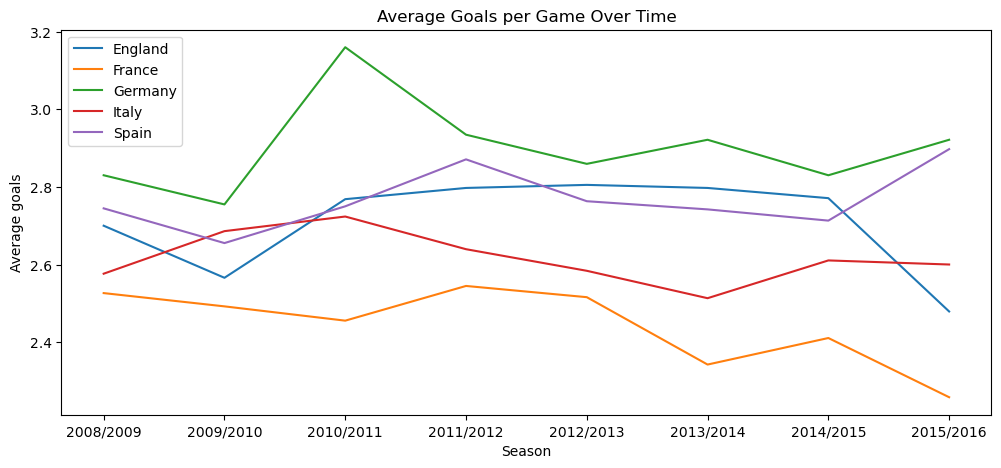

In [52]:
#ploting a timeseries using matplotlib
df.plot(figsize=(12,5),title='Average Goals per Game Over Time')
plt.xlabel('Season')
plt.ylabel('Average goals')

In [54]:
#Creating an empty dataframe with index being unique seasons and columns being unique 
#countries in leagues_by_season df

df2 = pd.DataFrame(pd.DataFrame(index=np.sort(leages_by_season['season'].unique()),
                               columns=leages_by_season['country_name'].unique()))

#Time to fill out dataframe with values for total goals per game for each season in each league

df2.loc[:,'Germany'] = list(leages_by_season.loc[leages_by_season['country_name']=='Germany','total_goals'])
df2.loc[:,'Spain']   = list(leages_by_season.loc[leages_by_season['country_name']=='Spain','total_goals'])
df2.loc[:,'France']   = list(leages_by_season.loc[leages_by_season['country_name']=='France','total_goals'])
df2.loc[:,'Italy']   = list(leages_by_season.loc[leages_by_season['country_name']=='Italy','total_goals'])
df2.loc[:,'England']   = list(leages_by_season.loc[leages_by_season['country_name']=='England','total_goals'])

df2


,England,France,Germany,Italy,Spain
2008/2009,1026,960,866,979,1043
2009/2010,975,947,843,1018,1009
2010/2011,1052,933,967,1035,1045
2011/2012,1063,967,898,1003,1091
2012/2013,1066,956,875,925,1050
2013/2014,1063,890,894,955,1042
2014/2015,1053,916,866,992,1031
2015/2016,942,858,894,988,1101


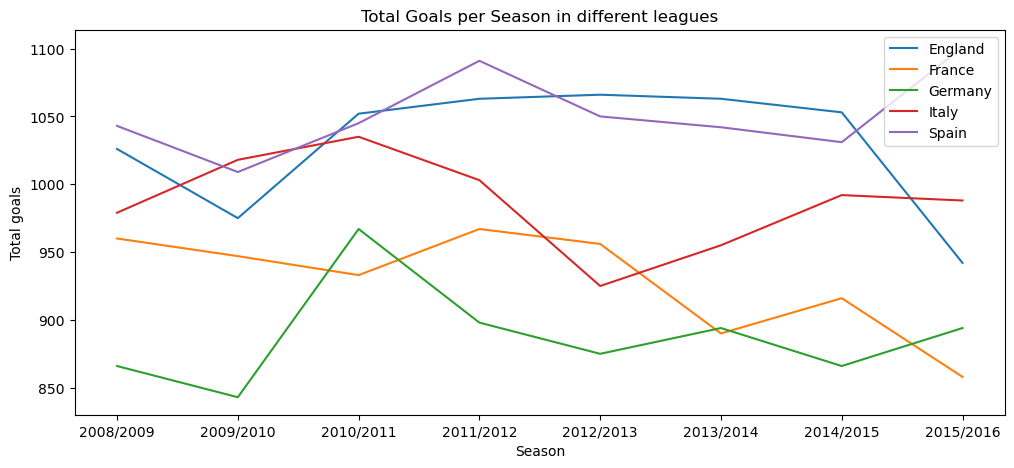

In [58]:
#Ploting a timeseries using matplotlib
df2.plot(figsize=(12,5),title='Total Goals per Season in different leagues')
plt.xlabel('Season')
plt.ylabel('Total goals')
plt.legend(loc=1)

In [61]:
sql='''
SELECT * 
FROM Player_Attributes
GROUP BY Player_Attributes.player_api_id'''

df = pd.read_sql(sql,conn)
df

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,139844,148544,2625,2015-01-16 00:00:00,61,61,right,medium,medium,50,...,55.0,66,62,63,54.0,12,11,6,8,8
1,44145,135819,2752,2015-10-16 00:00:00,72,72,right,medium,medium,39,...,55.0,38,72,74,67.0,12,7,8,10,16
2,88285,110019,2768,2016-03-17 00:00:00,74,74,left,medium,medium,44,...,60.0,16,76,76,77.0,12,15,13,14,10
3,72142,182861,2770,2013-07-05 00:00:00,69,69,right,medium,low,58,...,68.0,69,33,43,25.0,12,13,6,14,15
4,5122,110809,2790,2010-08-30 00:00:00,67,77,left,None,7,72,...,60.0,54,70,73,69.0,8,14,8,13,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11055,66602,226508,744907,2016-06-09 00:00:00,53,67,left,medium,medium,43,...,52.0,53,40,49,50.0,9,14,13,12,9
11056,58305,233930,746419,2016-05-12 00:00:00,59,66,right,high,medium,55,...,40.0,43,55,69,62.0,7,10,7,9,9
11057,60180,233969,748432,2016-05-12 00:00:00,58,68,right,medium,medium,48,...,36.0,45,63,69,68.0,8,8,12,12,6
11058,147409,225462,750435,2016-04-14 00:00:00,60,74,right,medium,low,35,...,58.0,61,18,19,21.0,9,10,8,10,11


In [60]:
sql='''
SELECT  Player_Attributes.player_api_id, 
        avg(Player_Attributes.overall_rating) AS avg_overall_rating,
        avg(Player_Attributes.potential) AS avg_potential  
FROM Player_Attributes
GROUP BY Player_Attributes.player_api_id'''

df = pd.read_sql(sql,conn)
df

,player_api_id,avg_overall_rating,avg_potential
0,2625,60.142857,61.142857
1,2752,69.380952,70.380952
2,2768,69.285714,70.571429
3,2770,71.133333,73.533333
4,2790,70.200000,75.800000
...,...,...,...
11055,744907,51.909091,65.909091
11056,746419,59.000000,66.000000
11057,748432,58.000000,68.000000
11058,750435,56.444444,70.444444


In [63]:
sql = """
SELECT CASE
            WHEN ROUND(height)<165 then 165
            WHEN ROUND(height)>195 then 195
            ELSE ROUND(height)
       END AS calc_height, 
       COUNT(height) AS distribution, 
       (avg(PA_Grouped.avg_overall_rating)) AS avg_overall_rating,
       (avg(PA_Grouped.avg_potential)) AS avg_potential,
       AVG(weight) AS avg_weight 
FROM PLAYER
LEFT JOIN (SELECT   Player_Attributes.player_api_id, 
                    avg(Player_Attributes.overall_rating) AS avg_overall_rating,
                    avg(Player_Attributes.potential) AS avg_potential  
                    FROM Player_Attributes
                    GROUP BY Player_Attributes.player_api_id) 
                    AS PA_Grouped ON PLAYER.player_api_id = PA_Grouped.player_api_id
GROUP BY calc_height
ORDER BY calc_height
                       
                       ;"""
players_height = pd.read_sql(sql,conn)
players_height

,calc_height,distribution,avg_overall_rating,avg_potential,avg_weight
0,165.0,74,67.365543,73.327754,139.459459
1,168.0,118,67.500518,73.124182,144.127119
2,170.0,403,67.726903,73.379056,147.799007
3,173.0,530,66.980272,72.848746,152.824528
4,175.0,1188,66.805204,72.258774,156.111953
5,178.0,1489,66.367212,71.943339,160.665547
6,180.0,1388,66.419053,71.846394,165.261527
7,183.0,1954,66.634380,71.754555,170.167861
8,185.0,1278,66.928964,71.833475,174.636933
9,188.0,1305,67.094253,72.151949,179.278161


<AxesSubplot:title={'center':'Potential vs Height'}, xlabel='calc_height'>

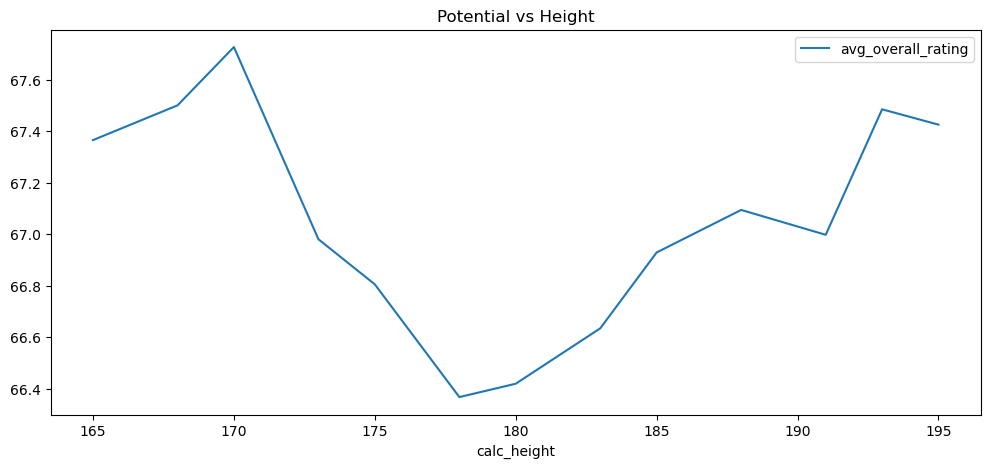

In [65]:
#Ploting a ine graph of calc_hieght vs avg_potential 
players_height.plot(x='calc_height',y='avg_overall_rating',figsize=(12,5),
                    title='Potential vs Height')